Сегодня у нас Hello world глубокого обучения, будем распозвновать рукописные цифры MNIST

In [2]:
from IPython.display import Image

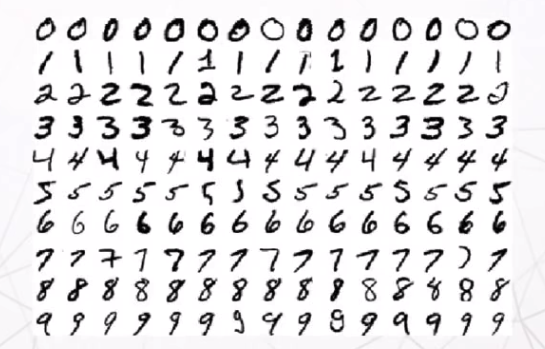

In [3]:
Image('MINST_img.png')

В США это была одна из первых задач МЛ, для распознования почтовых индексов, в США небыло таких гостов написания как у нас, поэтому им надо было понимать, что это за цифра

Сейчас мы повторим успех США в создании первой глубокой нейронной сети и и научим нашу нейронку распозновать рукописные цифры

Входные данные
* Интенсивность пикселов в изображении
* Количество значений: 784(28*28 пикселов)

Какая будет нейронная сеть:
* 800 нейронов

Выходной слой:
* 10 нейронов
* Вероятность изображения

Выходной слой:

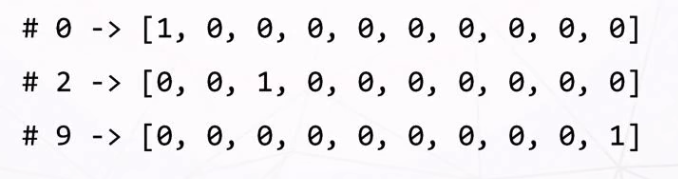

In [4]:
Image('Выходной слой.png')

In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import toimage
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [13]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

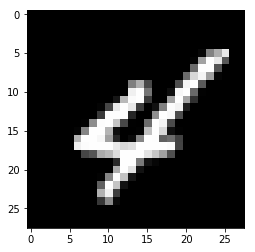

In [14]:
plt.imshow(toimage(X_train[127]).convert('RGBA'))
plt.show()

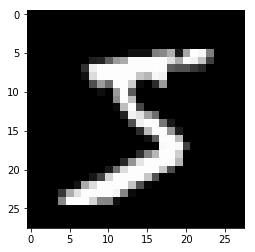

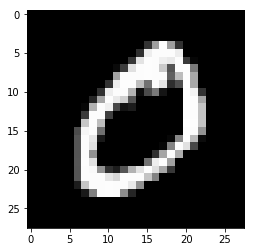

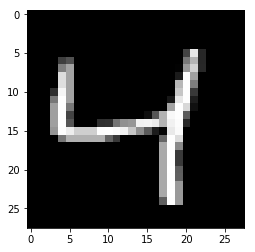

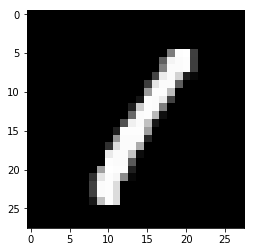

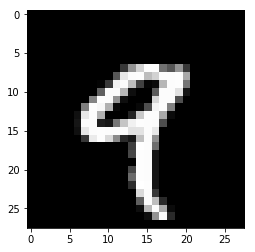

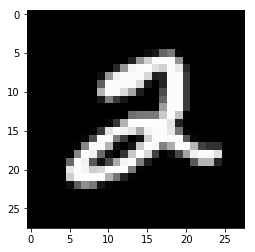

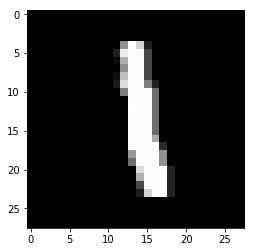

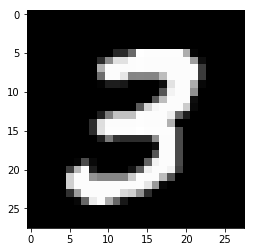

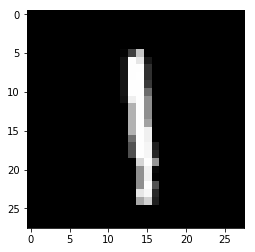

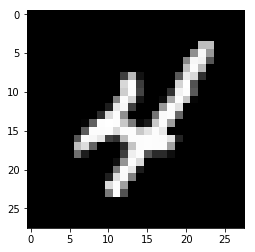

In [15]:
for i in range(10):
    plt.imshow(toimage(X_train[i]).convert('RGBA'))
    plt.show()

In [16]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [17]:
X_train = X_train.astype('float32')
X_train = X_train / 255 

In [18]:
print(y_train[127])

4


In [23]:
y_train = utils.to_categorical(y_train, 10)

In [19]:
model = Sequential()

In [20]:
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

In [21]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
model.fit(X_train, y_train, batch_size=200, epochs=20,  verbose=1)

Epoch 1/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.2746 - acc: 0.9230
Epoch 2/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.1117 - acc: 0.9684
Epoch 3/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0716 - acc: 0.9792
Epoch 4/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0512 - acc: 0.9849
Epoch 5/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.0372 - acc: 0.9890
Epoch 6/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.0258 - acc: 0.9930
Epoch 7/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.0196 - acc: 0.9952
Epoch 8/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0146 - acc: 0.9968
Epoch 9/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0117 - acc: 0.9975
Epoch 10/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0081 - acc: 0.9986

In [25]:
img_path = '3.png'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

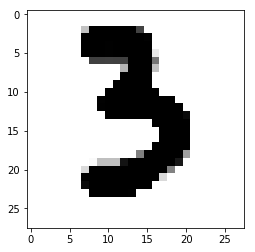

In [26]:
plt.imshow(img.convert('RGBA'))
plt.show()

In [27]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

In [28]:
prediction = model.predict(x)

In [30]:
print(prediction)

[[6.1312523e-25 1.8096602e-16 1.2063869e-11 1.0000000e+00 1.2240297e-30
  7.3043920e-15 9.7649027e-20 2.9969824e-24 1.7362337e-14 3.9589519e-17]]


In [29]:
print(np.argmax(prediction))

3
